In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic'
rcParams['figure.figsize']=17,8


In [2]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic'
rcParams['figure.figsize']=17,8

import warnings
warnings.filterwarnings('ignore')


In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


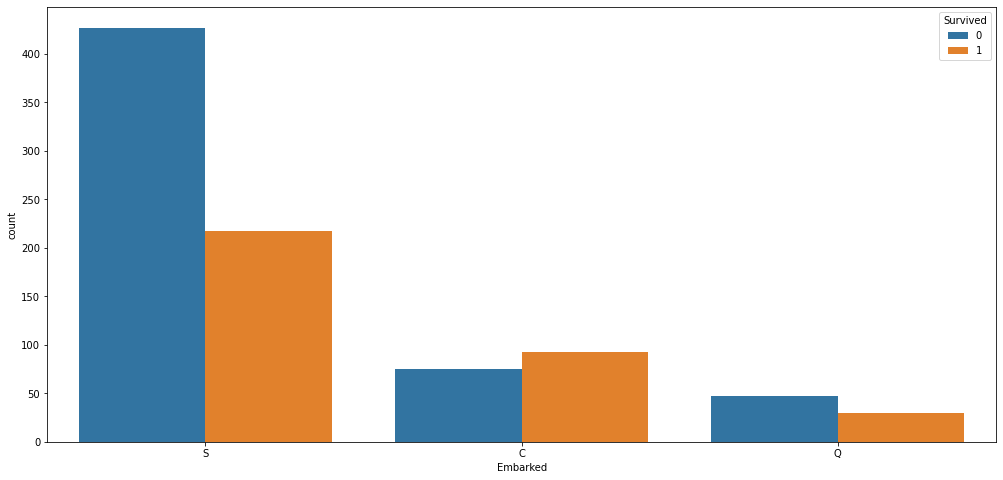

In [4]:
sns.countplot(data = titanic_data, x = 'Embarked', hue = 'Survived')

In [5]:
# NaN 확인 // Drop? 

# nan_df = titanic_data[titanic_data.isna().any(axis = 1)]

# titanic_data = titanic_data.dropna(how = 'all')

# titanic_data

# [Corrected Approach]
titanic_data[titanic_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# Embarked의 값이 'S'인 데이터 확인

# titanic_data[titanic_data['Embarked'] == 'S'] => 이건 S값만 찾는 것 

titanic_data.loc[titanic_data.Embarked.isnull(), 'Embarked'] = 'S'
titanic_data.Embarked = titanic_data.Embarked.fillna("S")

titanic_data.loc[titanic_data.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
# titanic_data_Embsum = titanic_data.groupby('Embarked').sum()
# titanic_data_Embsum['Percentage(Passenger)'] 

#[Corrected Approach] Class마다 승객이 몇명 탔을까? %로 Convert

titanic_data.Embarked.value_counts() / titanic_data.shape[0] * 100 # 891로 나눔

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

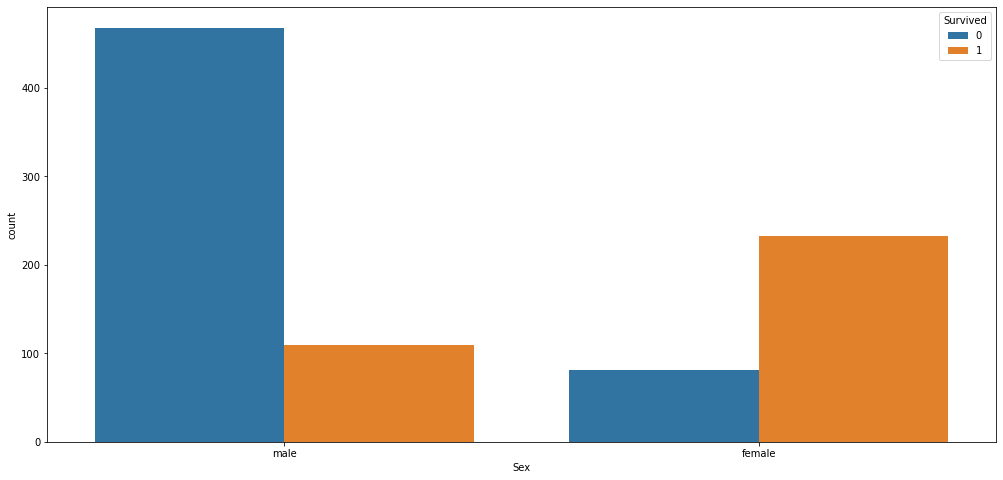

In [8]:
# Find survivor by genders
titanic_data.Survived.value_counts() 

sns.countplot(data = titanic_data, x = 'Sex', hue = 'Survived')


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

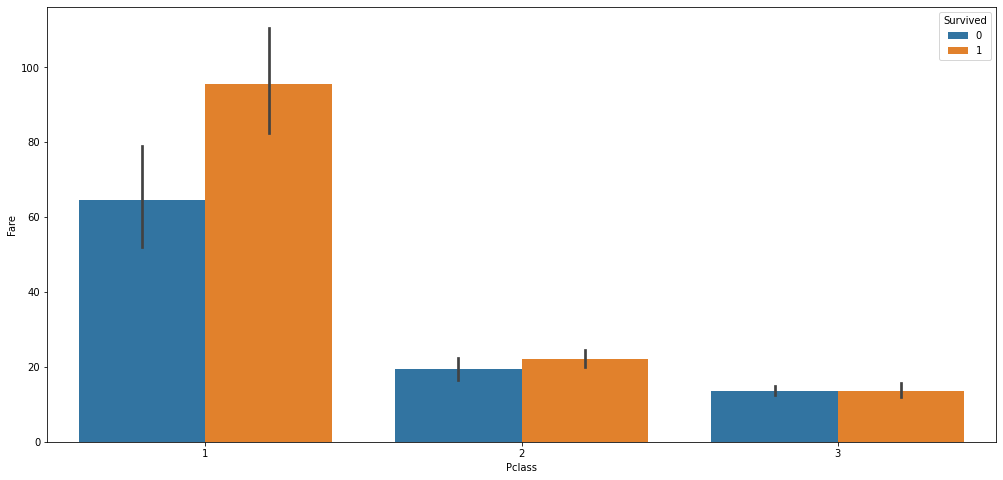

In [9]:
# x Pclass & y fare & hue Survived
sns.barplot(data = titanic_data, x = 'Pclass', y = 'Fare', hue = 'Survived')

In [10]:
# Fare <= 500
titanic_data[titanic_data.Fare > 500]

# Fare 1/3로 modify 
titanic_data.loc[titanic_data.Fare > 500,'Fare'] = 512 / 3

titanic_data[titanic_data.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
# Survivor / Perished distplot // by fare 

perish = titanic_data[titanic_data.Survived == 0]
survived = titanic_data[titanic_data.Survived == 1]



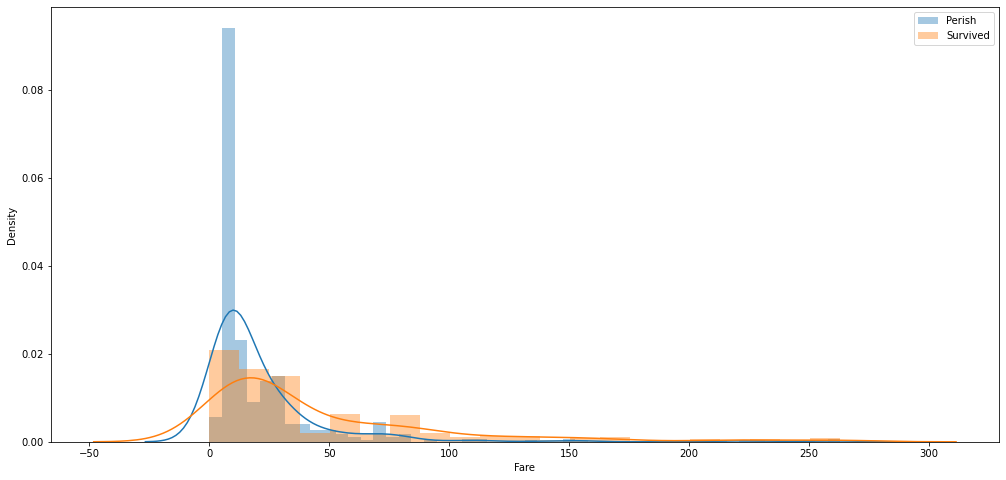

In [12]:
sns.distplot(perish.Fare, label = 'Perish')
sns.distplot(survived.Fare, label = 'Survived')

plt.legend()

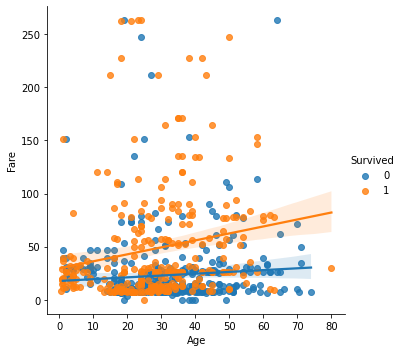

In [13]:
# lmplot
sns.lmplot(data = titanic_data, x = 'Age', y= 'Fare', hue = 'Survived')

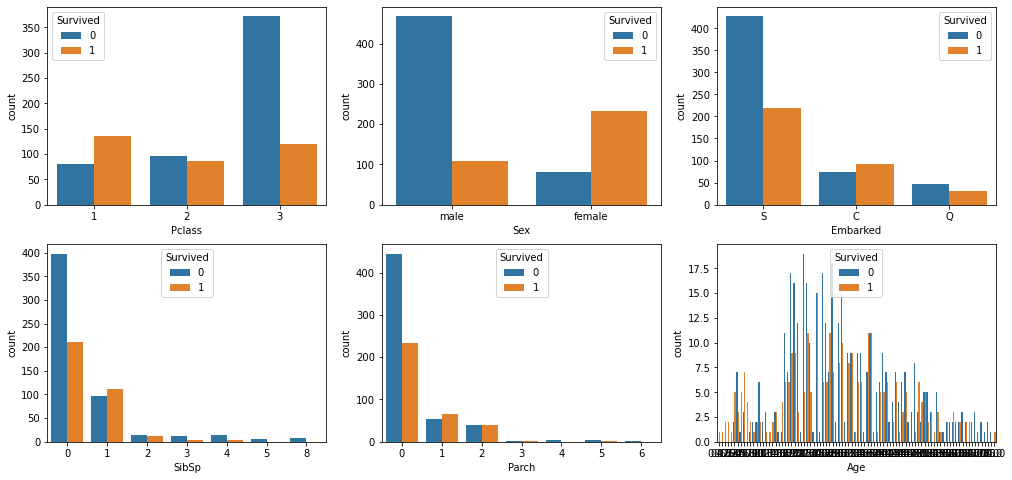

<Figure size 1224x576 with 0 Axes>

In [14]:
# total 6



f,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols = 3, nrows = 2)

#1 
sns.countplot(data = titanic_data, x = 'Pclass', hue = 'Survived', ax = ax1)


#2 
sns.countplot(data = titanic_data, x = 'Sex', hue = 'Survived',ax = ax2)


#3
sns.countplot(data = titanic_data, x = 'Embarked', hue = 'Survived',ax = ax3)


#4
sns.countplot(data = titanic_data, x = 'SibSp', hue = 'Survived', ax = ax4)


#5

sns.countplot(data = titanic_data, x = 'Parch', hue = 'Survived', ax = ax5)


#6
sns.countplot(data = titanic_data, x = 'Age', hue = 'Survived', ax = ax6)
plt.show()

plt.savefig('titanic_datareport.pdf')

In [15]:
# Group by family
titanic_data['Family_Size'] = titanic_data.SibSp + titanic_data.Parch
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [16]:
# If family size == 0 => Alone, else mark as 0
titanic_data.loc[titanic_data.Family_Size == 0, 'Alone'] = 1
titanic_data.loc[titanic_data.Family_Size != 0, 'Alone'] = 0

titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1.0


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

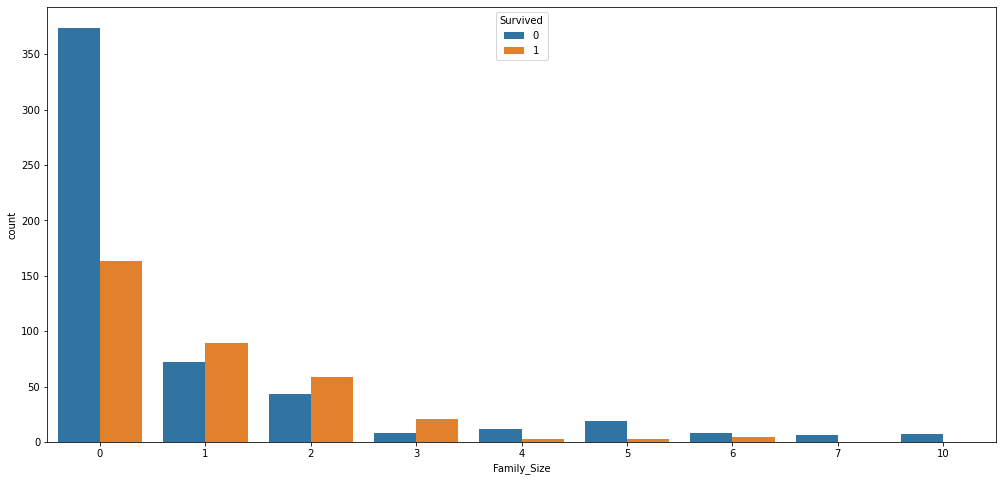

In [17]:
sns.countplot(data = titanic_data, x= 'Family_Size', hue = 'Survived')